In [165]:
import numpy as np
import cv2
from matplotlib.pyplot import imshow
from matplotlib import pyplot as plt

In [166]:
image_files = ["cat.jpg", "flower.jpg", "orange.jpg", "text_1.jpg", "text_2.png"]
images_gray = [cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2GRAY) for img in image_files]

In [167]:
def otsu(img_gray):
    hist, _ = np.histogram(img_gray.ravel(), bins=256, range=(0, 256))
    p = hist / np.sum(hist)
    q1, q2 = np.cumsum(p), np.cumsum(p[::-1])[::-1]
    m1 = np.cumsum(p * np.arange(256)) / (q1 + 1e-10)
    m2 = (np.cumsum((p * np.arange(256))[::-1]) / (q2[::-1] + 1e-10))[::-1]
    s_acc = q1[:-1] * q2[1:] * np.square(m1[:-1] - m2[1:])
    threshold = np.argmax(s_acc)
    _, img_bin_otsu = cv2.threshold(img_gray, threshold, 255, cv2.THRESH_BINARY)
    return img_bin_otsu

In [168]:
# Метод Ніблека
def niblack_binarization(img_gray, window_size=15, k=-0.2):
    mean = cv2.boxFilter(img_gray, ddepth=-1, ksize=(window_size, window_size))
    mean_sq = cv2.boxFilter(img_gray**2, ddepth=-1, ksize=(window_size, window_size))
    stddev = np.sqrt(mean_sq - mean**2)
    threshold_niblack = mean + k * stddev
    img_niblack = (img_gray > threshold_niblack).astype(np.uint8) * 255
    return img_niblack

img_niblack = niblack_binarization(img_gray)

In [169]:
# Метод Сауволи
def sauvola_binarization(img_gray, window_size=15, k=0.5, R=128):
    mean = cv2.boxFilter(img_gray, ddepth=-1, ksize=(window_size, window_size))
    mean_sq = cv2.boxFilter(img_gray**2, ddepth=-1, ksize=(window_size, window_size))
    stddev = np.sqrt(mean_sq - mean**2)
    threshold_sauvola = mean * (1 + k * ((stddev / R) - 1))
    img_sauvola = (img_gray > threshold_sauvola).astype(np.uint8) * 255
    return img_sauvola

img_sauvola = sauvola_binarization(img_gray)

In [170]:

# Метод Крістіана
def christiansen_binarization(img_gray, window_size=15, k=0.5):
    mean = cv2.blur(img_gray, (window_size, window_size))
    stddev = np.sqrt(cv2.blur(img_gray**2, (window_size, window_size)) - mean**2)
    threshold_christiansen = mean * (1 + k * ((stddev / 128) - 1))
    img_christian = (img_gray > threshold_christiansen).astype(np.uint8) * 255
    return img_christian

img_christian = christiansen_binarization(img_gray)

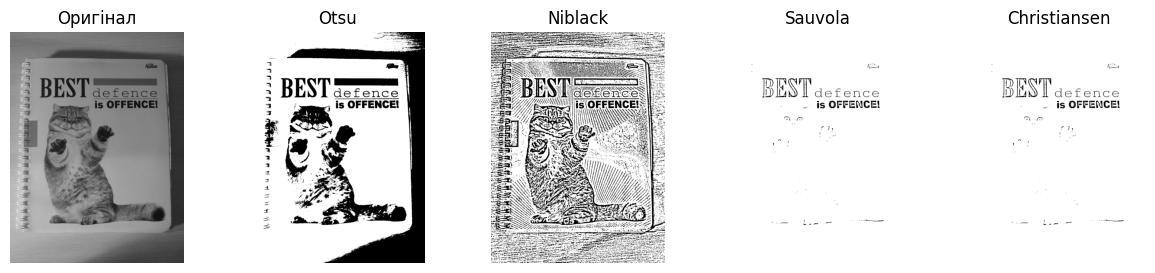

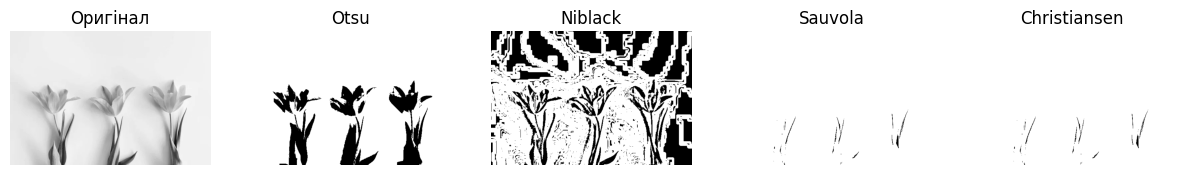

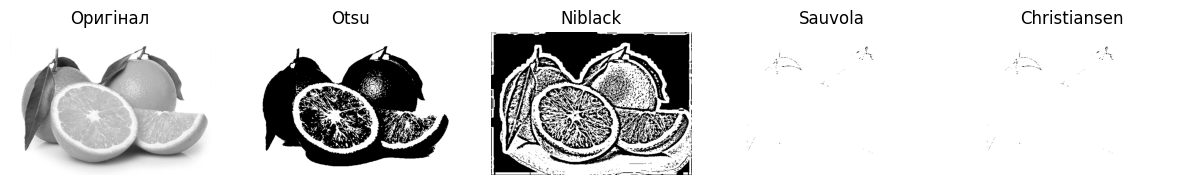

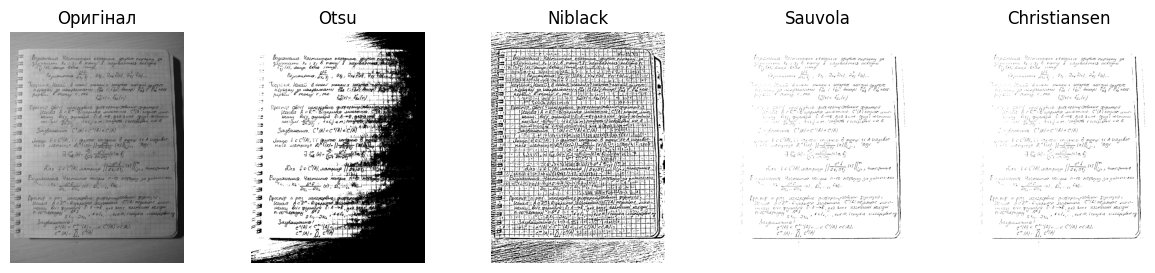

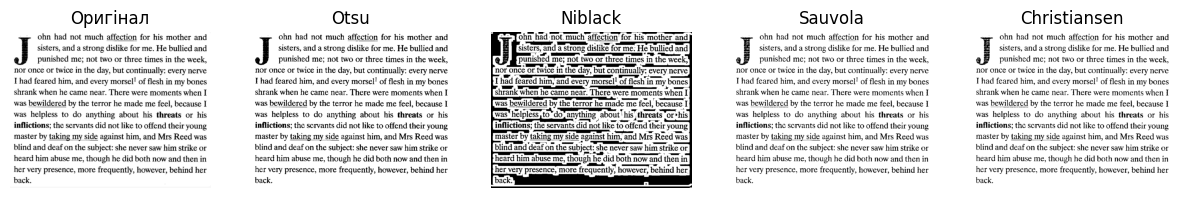

In [171]:
image_files = ["cat.jpg", "flower.jpg", "orange.jpg", "text_1.jpg", "text_2.png"]
images = [cv2.imread(img, cv2.IMREAD_GRAYSCALE) for img in image_files]

for i, img_gray in enumerate(images):
    img_otsu = otsu(img_gray)
    img_niblack = niblack_binarization(img_gray)
    img_sauvola = sauvola_binarization(img_gray)
    img_christian = christiansen_binarization(img_gray)

    plt.figure(figsize=(15, 3))
    plt.subplot(1, 5, 1)
    plt.title("Оригінал")
    plt.imshow(img_gray, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 5, 2)
    plt.title("Otsu")
    plt.imshow(img_otsu, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 5, 3)
    plt.title("Niblack")
    plt.imshow(img_niblack, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 5, 4)
    plt.title("Sauvola")
    plt.imshow(img_sauvola, cmap="gray")
    plt.axis("off")

    plt.subplot(1, 5, 5)
    plt.title("Christiansen")
    plt.imshow(img_christian, cmap="gray")
    plt.axis("off")

    plt.show()